<a href="https://colab.research.google.com/github/vishalraul/Credit-Card-Default-Prediction-/blob/main/3_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
'''import warnings
warnings.filterwarnings("ignore")'''

'import warnings\nwarnings.filterwarnings("ignore")'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Capstone Project-03/default of credit card clients.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
#size of Dataset
data.shape

(30000, 25)

In [ ]:
#data columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Attribute function null values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

In [ ]:
#Descriptive statistics
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#correlation matrics
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Isdefaulter
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_SEPT,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_AUG,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_JUL,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_JUN,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


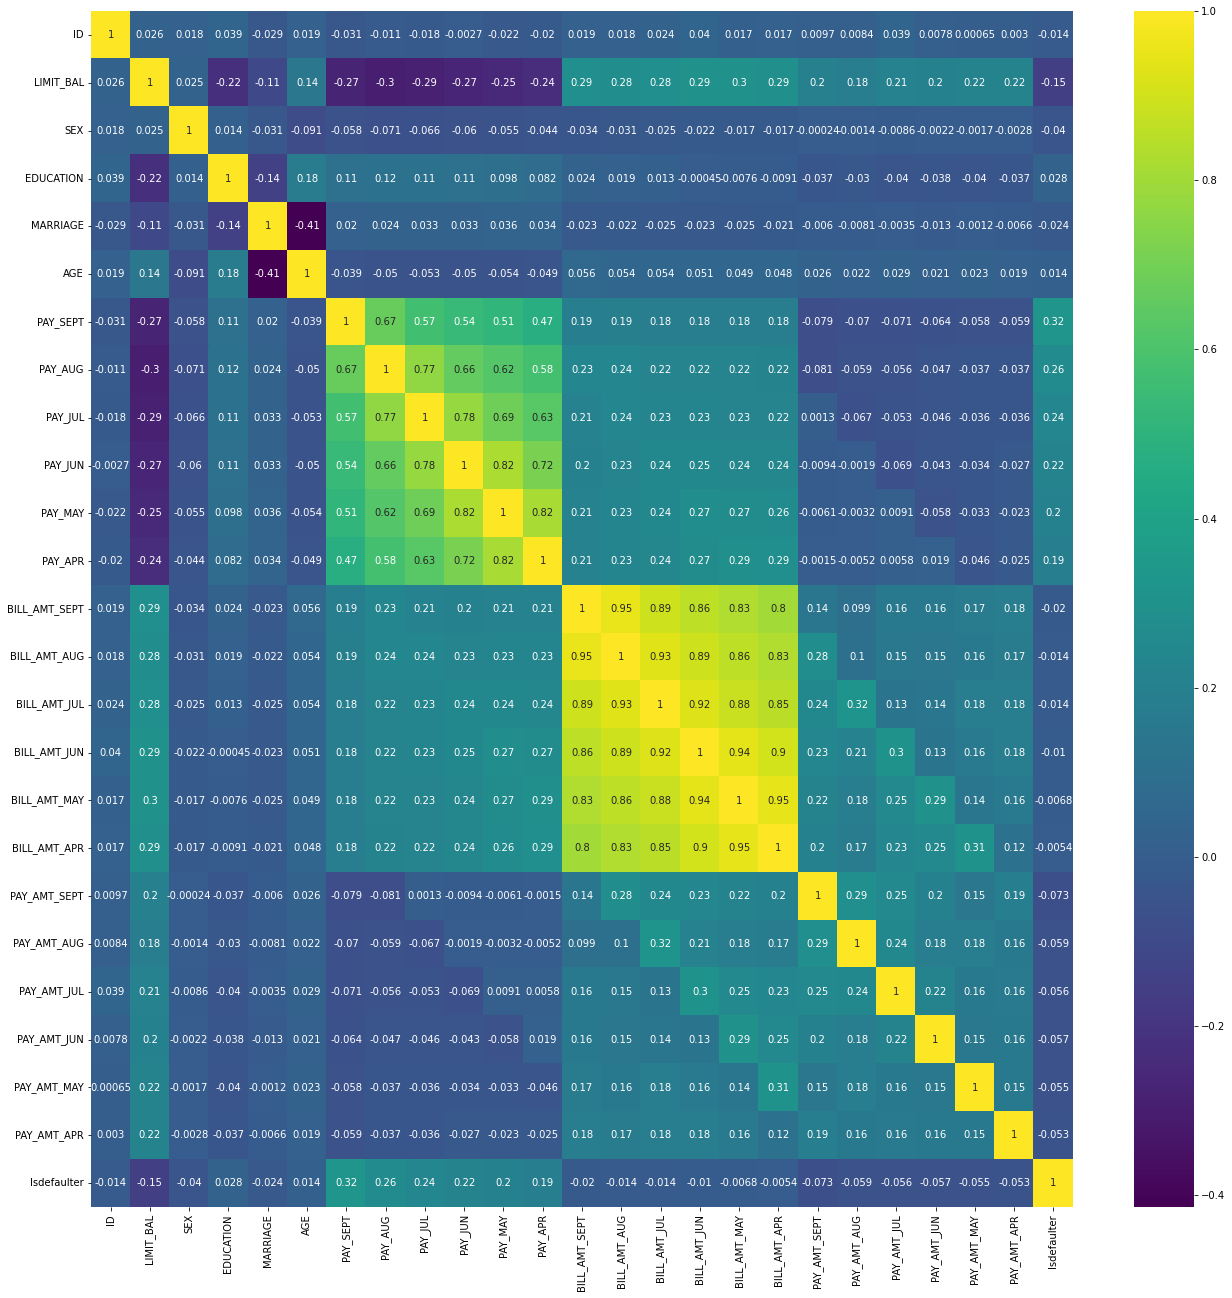

In [ ]:
#correlation matrics heatmap
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

## **Exploratory Data Analysis**

In [ ]:
Isdefaulter = data['default payment next month'].value_counts()
Isdefaulter

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
#check percentage of defaulter

Non_Defaulter = round((Isdefaulter[0]/len(data['default payment next month'])*100),2)
print('Non_Defaulter :', Non_Defaulter)
Defaulter = round((Isdefaulter[1]/len(data['default payment next month'])*100),2)
print('Defaulter :', Defaulter)


Non_Defaulter : 77.88
Defaulter : 22.12


We can see that there is only 22.12% Defaulter.

In [ ]:
#renaming for better understanding
data.rename(columns= {'default payment next month' : 'Isdefaulter'}, inplace=True )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


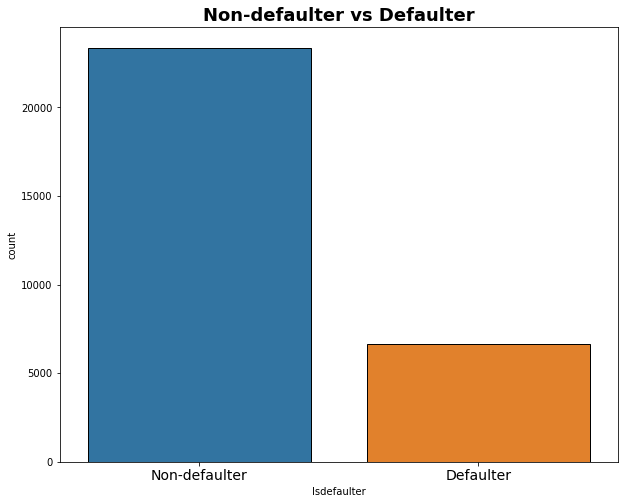

In [ ]:
#plot the distribution of defaulter counts
plt.figure(figsize=(10,8))
sns.countplot(data['Isdefaulter'], edgecolor = 'k')
plt.title('Non-defaulter vs Defaulter', fontsize=18, fontweight='bold')
plt.xticks([0,1], labels=['Non-defaulter','Defaulter'], fontsize=14)
plt.show()

We can see that from above graph that both classes are not in proportion and we have imbalanced dataset.

In [ ]:
#caterogorical features dataframe
categorical_feature = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = data[categorical_feature]

df_cat['Defaulter'] = data['Isdefaulter']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_cat.replace({'SEX': {1:'Male', 2:'Female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# **Analyzing Male and Female Defaulter**

In [ ]:
#SEX =X2: Gender (1 = male; 2 = female).
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Percentage of Male and female')

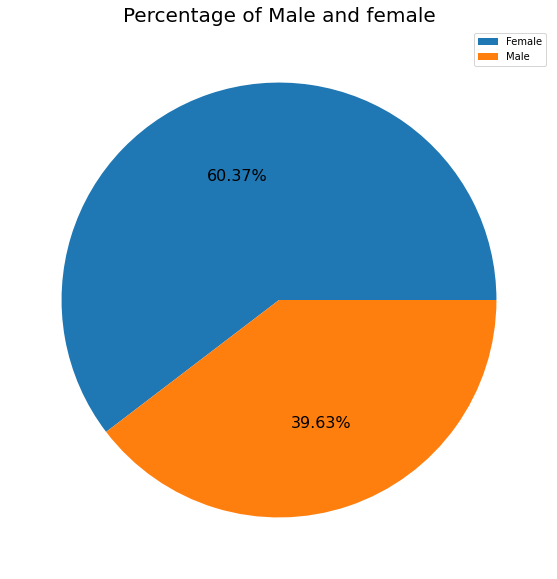

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_cat['SEX'].value_counts(),shadow = False ,autopct = '%1.2f%%',textprops = {"fontsize":16})
plt.legend(labels = ['Female','Male'])
plt.title("Percentage of Male and female", fontsize=20)

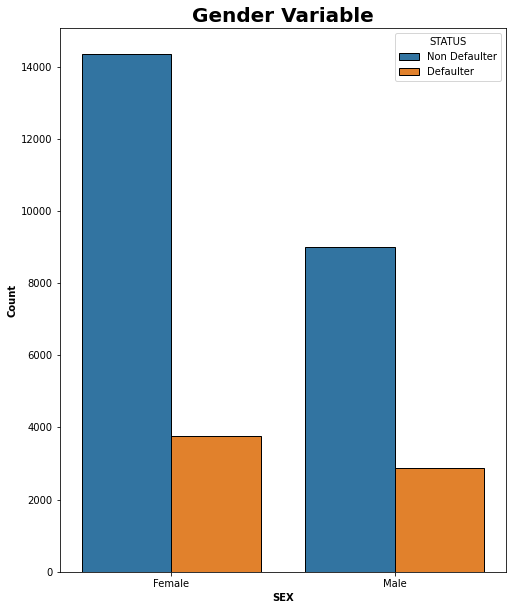

In [ ]:
#distribution of male and female defaulter
plt.figure(figsize=(8,10))

sns.countplot(x=df_cat['SEX'], hue='Defaulter', data=df_cat, edgecolor = 'k')
plt.xlabel('SEX',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Gender Variable', fontweight='bold',fontsize=20)
#plt.xticks([1,2], labels=['Male', 'Female'])
plt.legend(title='STATUS', loc='upper right', labels=['Non Defaulter', 'Defaulter'], fontsize=10)

**There are more females credit card holder,so number of defaulter have high proportion of females.**

# **Analyzing education base defaulter**

In [ ]:
df_cat['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
5                    280
others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

In [ ]:
df_cat['EDUCATION'] = df_cat['EDUCATION'].replace({5:'others', 6:'others', 0:'others'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Percentage of default by education')

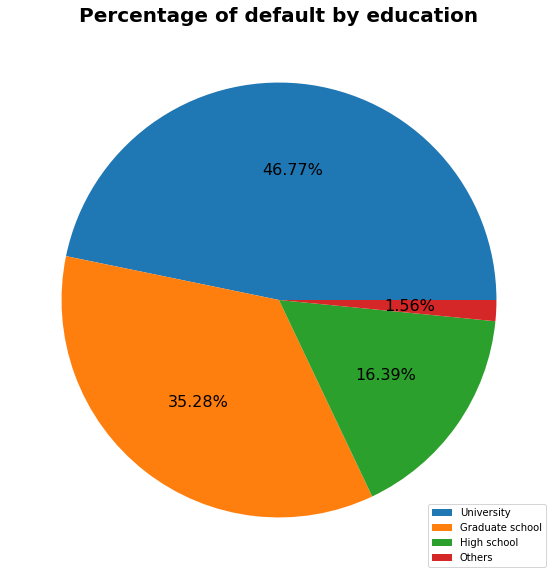

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_cat['EDUCATION'].value_counts(),shadow = False ,autopct = '%1.2f%%',textprops = {"fontsize":16})
plt.legend(labels = ['University','Graduate school','High school','Others' ])
plt.title("Educated Defaulter", fontweight='bold', fontsize=20)

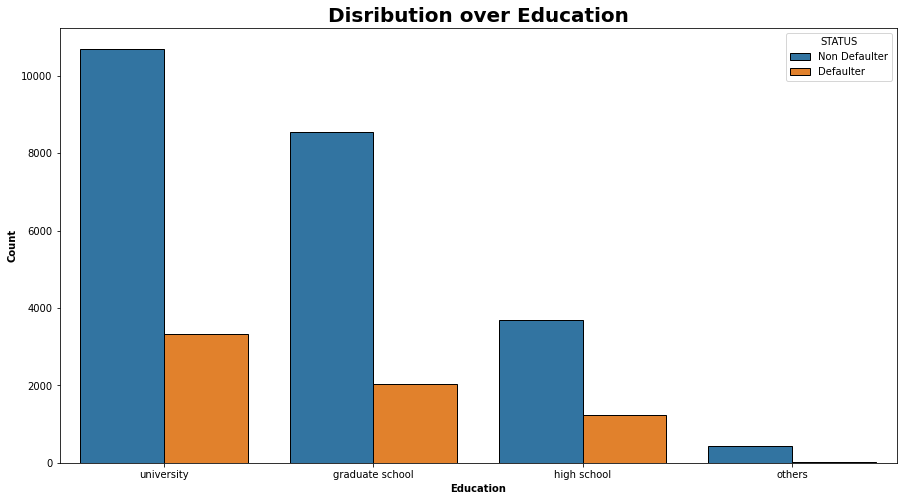

In [ ]:
#distribution Educated defaulter
plt.figure(figsize=(15,8))

sns.countplot(x=df_cat['EDUCATION'], hue='Defaulter', data=df_cat, edgecolor = 'k')
plt.xlabel('Education',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Disribution over Education', fontweight='bold',fontsize=20)
plt.legend(title='STATUS', loc='upper right', labels=['Non Defaulter', 'Defaulter'], fontsize=10)

**Maximum number of defaulter are educated people(University and Graduate school**

# **Analyzing Marital Status**

In [ ]:
df_cat['MARRIAGE'].value_counts()

single     15964
married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64

In [ ]:
df_cat['MARRIAGE'] = df_cat['MARRIAGE'].replace({0:'others'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Education of  Defaulter')

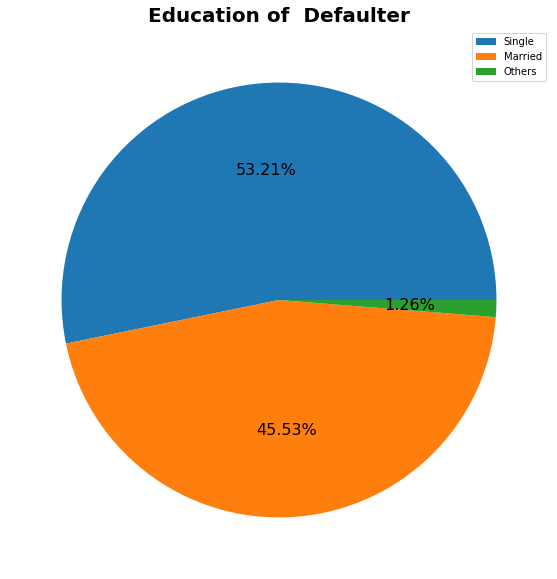

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_cat['MARRIAGE'].value_counts(),shadow = False ,autopct = '%1.2f%%',textprops = {"fontsize":16})
plt.legend(labels = ['Single','Married', 'Others'])
plt.title("Education of  Defaulter", fontweight='bold', fontsize=20)

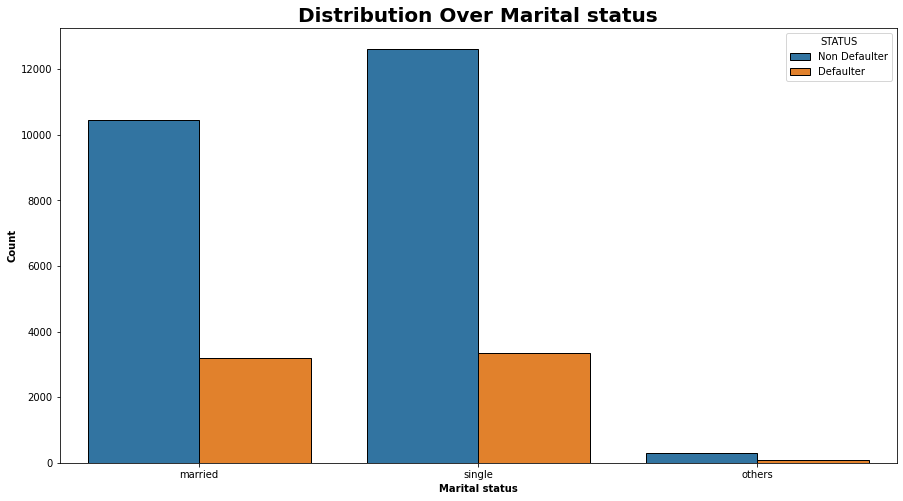

In [ ]:
#distribution Educated defaulter
plt.figure(figsize=(15,8))

sns.countplot(x=df_cat['MARRIAGE'], hue='Defaulter', data=df_cat, edgecolor = 'k')
plt.xlabel('Marital status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution Over Marital status', fontweight='bold',fontsize=20)
plt.legend(title='STATUS', loc='upper right', labels=['Non Defaulter', 'Defaulter'], fontsize=10)

Maximum Defaulters are single.

 **Limit Balance**

In [ ]:
# max and min balance limit
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


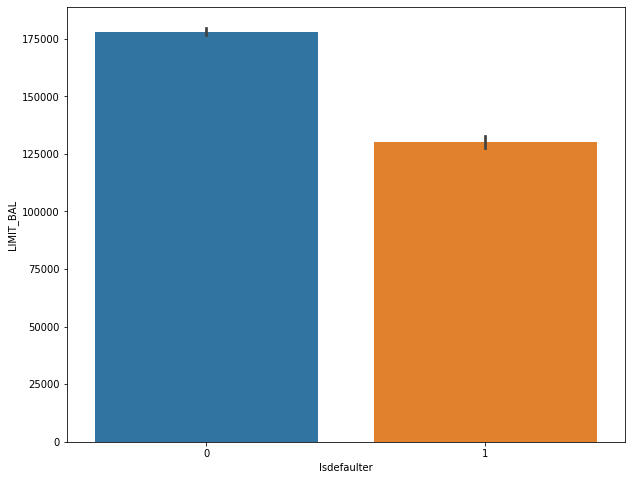

In [ ]:
#plot
plt.figure(figsize=(10,8))
sns.barplot(data['Isdefaulter'], data['LIMIT_BAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


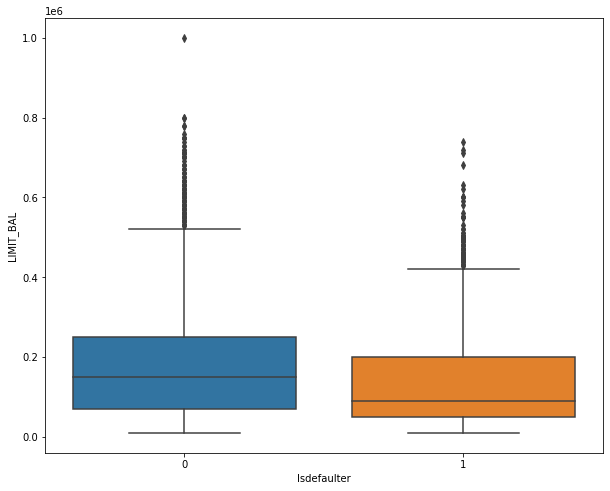

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data['Isdefaulter'], data['LIMIT_BAL'])

In [ ]:
#renaming columns 

data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Isdefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**AGE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Defaulter Age Distribution')

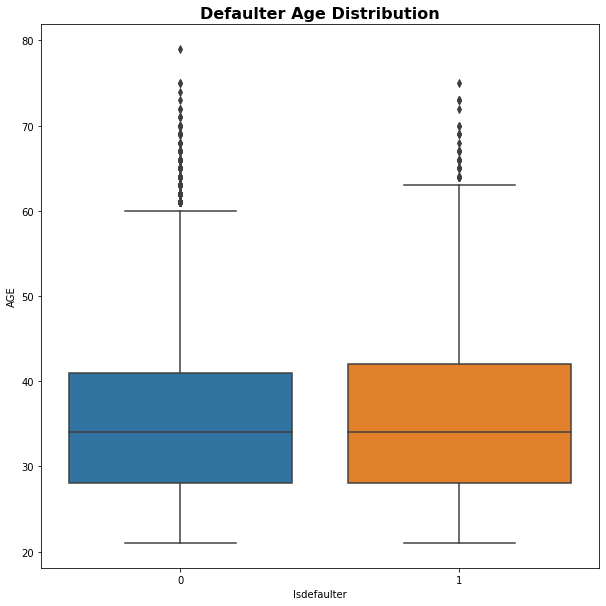

In [ ]:
#Defaulter age
plt.figure(figsize=(10,10))
sns.boxplot(data['Isdefaulter'], data['AGE'])
plt.title('Defaulter Age Distribution', fontsize='16', fontweight='bold')

From above plot it's cleared that the age of non defaulter and defaulter is between 28 to 42 Year.

**Bill Amount**

In [ ]:
bill_amt_df = data[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR', 'Isdefaulter']]

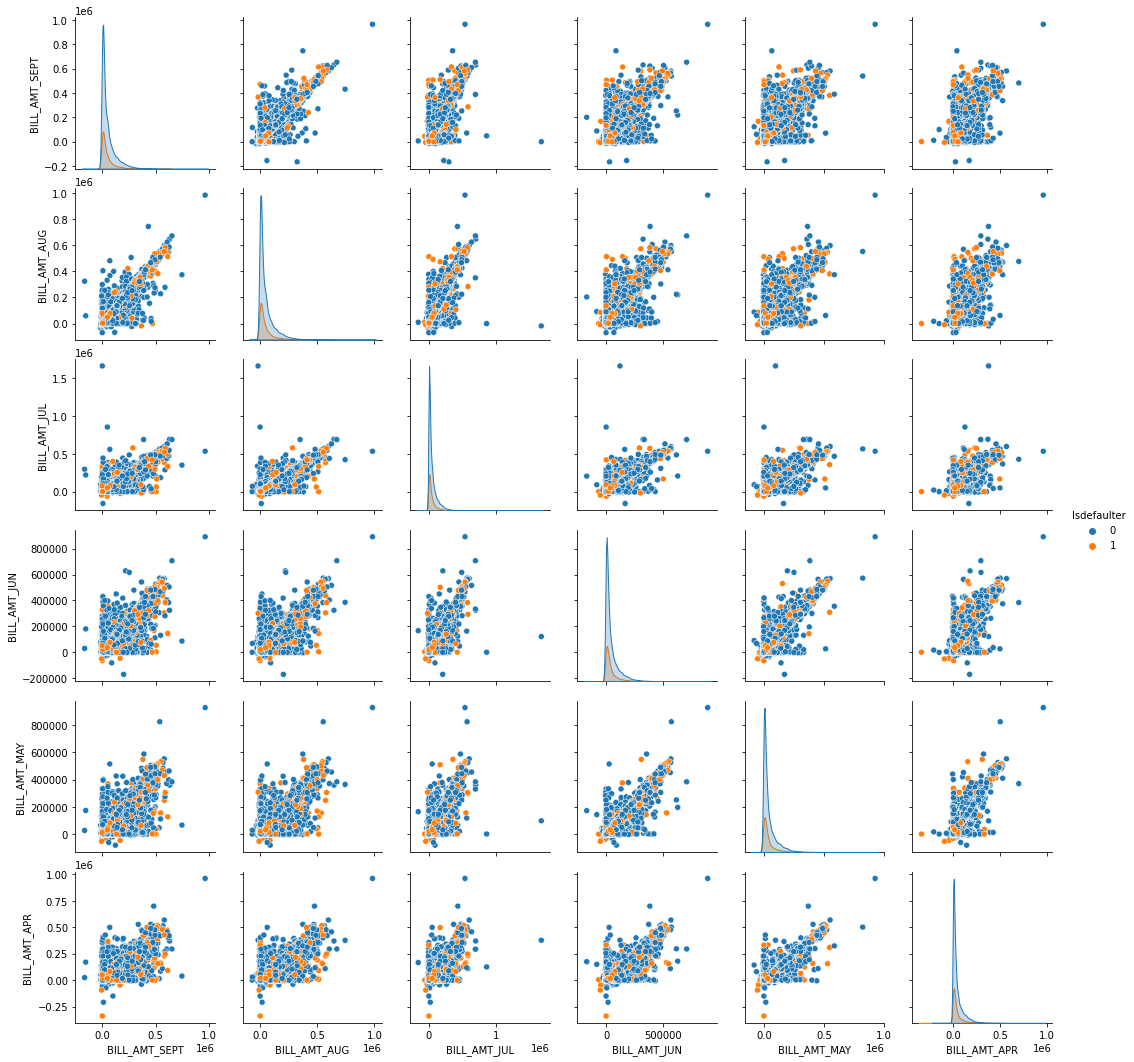

In [ ]:
sns.pairplot(data=bill_amt_df, hue='Isdefaulter')

**History payment status**

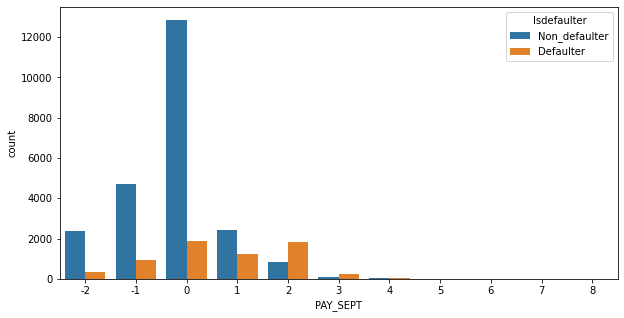

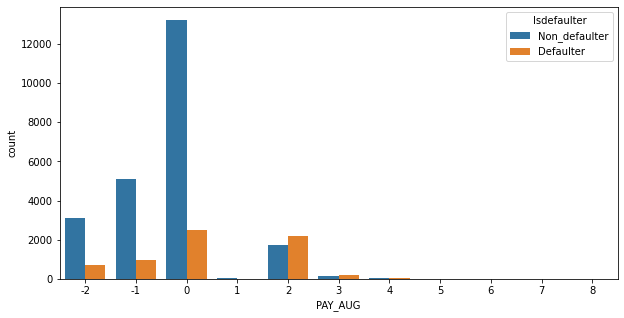

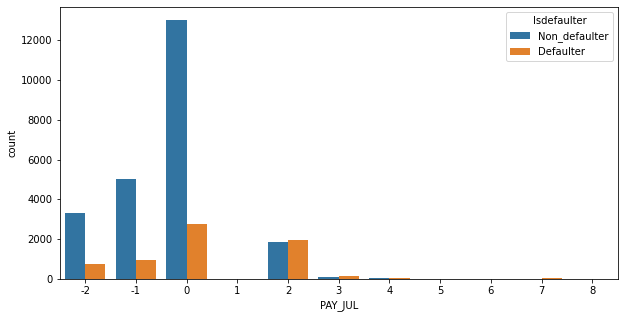

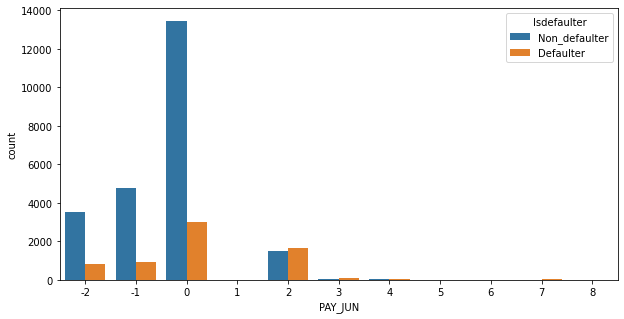

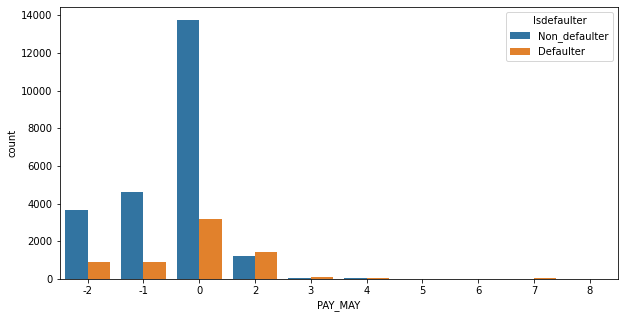

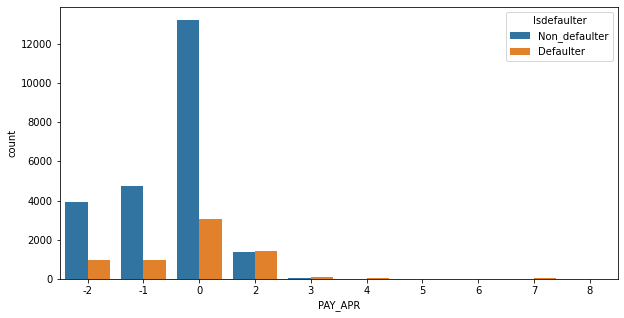

In [ ]:

pay_hist_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_hist_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, hue='Isdefaulter', data=data)
  plt.legend(title='Isdefaulter', loc='upper right', labels = ['Non_defaulter','Defaulter'])


**Paid Amount**

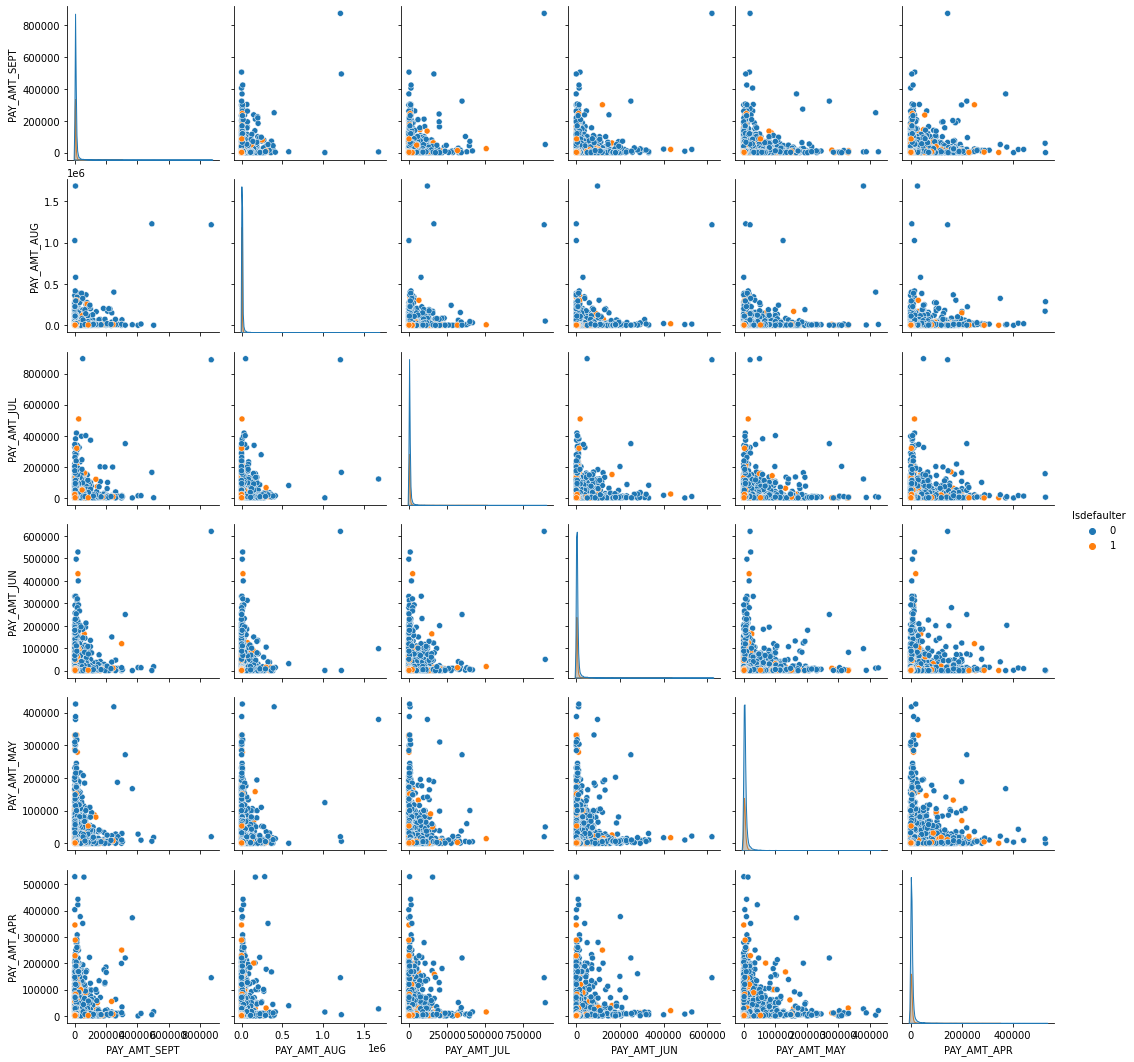

In [ ]:

pay_amt_df = data[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR','Isdefaulter']]
sns.pairplot(data = pay_amt_df, hue='Isdefaulter')


In [ ]:
#make independent and target variable dataframe
#independent
x = data.iloc[:,0:-1]
#dependent
y= data['Isdefaulter']

**As we have seem there is an enbalance dataset, so to re remediate imbalance we used SMOTE oversampling techique.**

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
print('Original dataset shape: ', len(data))
print('Resampled dataset shape: ', len(y_smote))

Original dataset shape:  30000
Resampled dataset shape:  46728


In [ ]:
columns = list(data.columns)

In [ ]:
columns.pop()

'Isdefaulter'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['Isdefaulter'] = y_smote

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


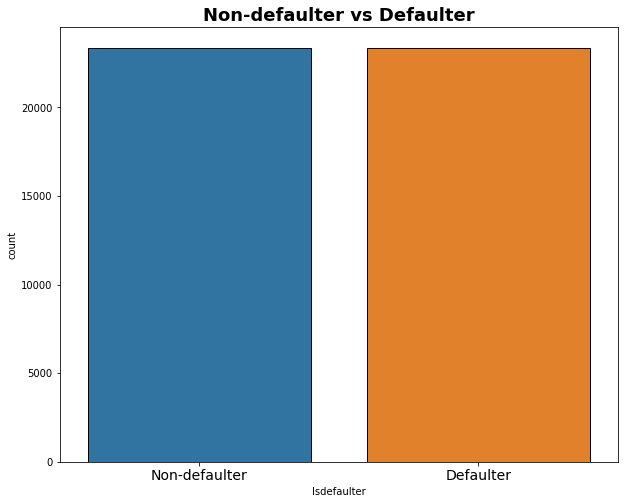

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(balance_df['Isdefaulter'], edgecolor = 'k')
plt.title('Non-defaulter vs Defaulter', fontsize=18, fontweight='bold')
plt.xticks([0,1], labels=['Non-defaulter','Defaulter'], fontsize=14)
plt.show()

# **Feature Engineering**

In [ ]:
df_fr = balance_df.copy()

In [ ]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']


In [ ]:
df_fr.groupby('Isdefaulter')['Payement_Value'].mean()

Isdefaulter
0   -1.980140
1    1.736175
Name: Payement_Value, dtype: float64

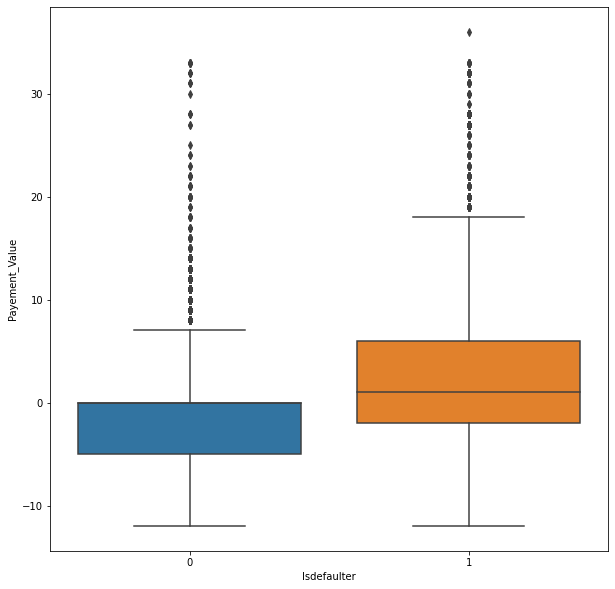

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Isdefaulter', y = 'Payement_Value',data = df_fr)

In [ ]:
df_fr.replace({'SEX': {1 : 1 , 2 : 0}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Isdefaulter,Payement_Value
0,1,20000,0,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2
1,2,120000,0,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,0,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,0,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2


# **One Hot Encoding**

In [ ]:
df_fr = pd.get_dummies(df_fr, columns=['EDUCATION', 'MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )


In [ ]:
df_fr.drop(['ID','EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
df_fr.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Isdefaulter,Payement_Value,EDUCATION_5,EDUCATION_6,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# **Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df_log_reg = df_fr.copy()

df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Isdefaulter,Payement_Value,EDUCATION_5,EDUCATION_6,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_log_reg.shape

(46728, 84)

In [ ]:
X = df_log_reg.drop(['Isdefaulter','Payement_Value'],axis=1)
y = df_log_reg['Isdefaulter']

In [ ]:
X.head(5)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_5,EDUCATION_6,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
columns = X.columns
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'EDUCATION_5', 'EDUCATION_6',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
      

In [ ]:
#Normalising Predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# spltting the dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2, stratify = y)

In [ ]:
# parameter tunnig
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'],
              'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=0.01)

In [ ]:
optimized_clf.coef_

array([[-2.45491521e-01,  4.02347978e-01, -9.42162425e-02,
        -1.56888554e-01,  1.44478002e-01,  1.49821538e-01,
        -4.68791695e-02, -1.13968504e-02,  4.62594982e-02,
        -2.31688783e-01, -1.63523507e-01, -1.18969886e-01,
        -6.54267493e-02, -8.02307176e-02, -1.67098537e-02,
        -1.28467281e-01, -3.23537440e-02,  1.90907025e-01,
        -2.28692632e-01,  2.13006266e-02,  3.92033310e-01,
        -1.27184975e-01,  3.50875784e-02,  1.96809218e-01,
         3.98110796e-01,  6.37222571e-01,  1.92670729e-01,
         7.48566447e-02,  4.27691807e-02,  2.40007000e-02,
         2.92703348e-02, -2.98086932e-02,  1.29158192e-01,
         1.31469361e-02,  6.80189886e-01,  6.69953243e-02,
         5.22335163e-03, -4.07252644e-02,  3.46586718e-02,
         1.67579591e-03,  3.23832152e-04, -2.52067510e-02,
        -5.14121095e-02, -4.41153580e-02,  6.93077059e-01,
         2.67575499e-02, -5.65280241e-03, -1.63471868e-02,
        -9.44755202e-03,  8.98904412e-02,  8.16036805e-0

In [ ]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_


0.7538597939405056

In [ ]:
#predicted probability
train_preds = optimized_clf.predict_proba(X_train)
train_preds

array([[0.669747  , 0.330253  ],
       [0.36826257, 0.63173743],
       [0.77698715, 0.22301285],
       ...,
       [0.49371401, 0.50628599],
       [0.2145914 , 0.7854086 ],
       [0.74425501, 0.25574499]])

In [ ]:
test_preds = optimized_clf.predict_proba(X_test)
test_preds

array([[1.20603316e-01, 8.79396684e-01],
       [6.84533018e-04, 9.99315467e-01],
       [1.86629630e-07, 9.99999813e-01],
       ...,
       [7.19370777e-01, 2.80629223e-01],
       [6.52989234e-06, 9.99993470e-01],
       [7.61618563e-01, 2.38381437e-01]])

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
train_class_preds

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
test_class_preds = optimized_clf.predict(X_test)
test_class_preds

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  0.7550215537008163
The accuracy on test data is  0.7544047364291319


In [ ]:
#Calculate Precision, Recall and F1-Score for test data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7010
           1       0.79      0.69      0.74      7009

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7544047364291319
The precision on test data is  0.6939649022685119
The recall on test data is  0.789354105809802
The f1 on test data is  0.7385923620074407
The roc_score on test data is  0.7581745710415945


In [ ]:
#generate confusion matrix for test data 
cm = confusion_matrix(y_train, train_class_preds)

In [ ]:
cm

array([[13373,  2981],
       [ 5032, 11323]])

[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

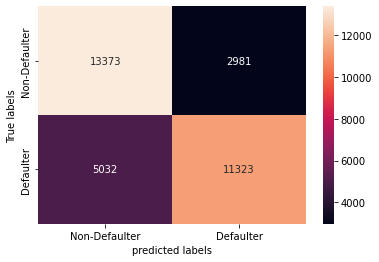

In [ ]:
labels = ['Non-Defaulter', 'Defaulter']
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel()})


In [ ]:
feature_importance[0:10]

,Features,Importance
0,LIMIT_BAL,0.245492
1,SEX,0.402348
2,AGE,0.094216
3,BILL_AMT_SEPT,0.156889
4,BILL_AMT_AUG,0.144478
5,BILL_AMT_JUL,0.149822
6,BILL_AMT_JUN,0.046879
7,BILL_AMT_MAY,0.011397
8,BILL_AMT_APR,0.046259
9,PAY_AMT_SEPT,0.231689


In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

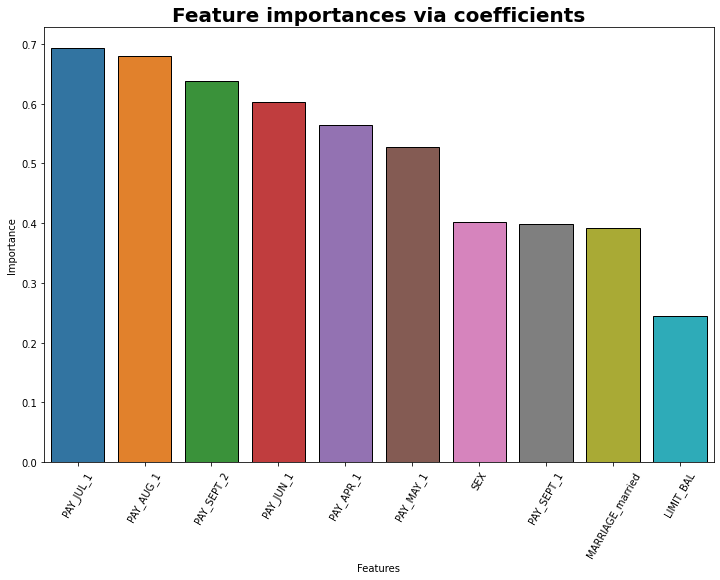

In [ ]:
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(feature_importance['Features'],feature_importance['Importance'], order=feature_importance['Features'].value_counts().index, edgecolor='k')
plt.title('Feature importances via coefficients',fontweight='bold',fontsize=20)
plt.xticks(rotation = 60)

In [ ]:
y_pred_proba_lr = optimized_clf.predict_proba(X_test)[::,1]
y_pred_proba_lr

array([0.87939668, 0.99931547, 0.99999981, ..., 0.28062922, 0.99999347,
       0.23838144])

In [ ]:
'''
#auc_roc_curve
fpr, tpr = roc_curve(y_test,y_pred_proba_lr)
auc = roc_auc_score(y_test,y_pred_proba_lr)
plt.plot(fpr,tpr, labels='data 1, auc'+str(auc))
'''

"\n#auc_roc_curve\nfpr, tpr = roc_curve(y_test,y_pred_proba_lr)\nauc = roc_auc_score(y_test,y_pred_proba_lr)\nplt.plot(fpr,tpr, labels='data 1, auc'+str(auc))\n"

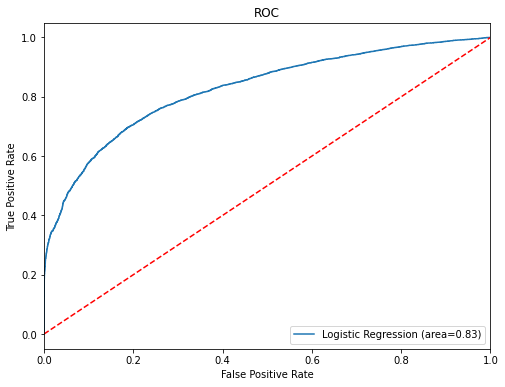

In [ ]:
logit_roc_auc  = roc_auc_score(y_test,y_pred_proba_lr)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_lr)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

# **Decision Tree**

Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
grid_DTC_clf.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [ ]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [ ]:
grid_DTC_clf.best_score_

0.7153672625485393

In [ ]:
# Get the predicted probability
train_preds_proba = optimal_DTC_clf.predict_proba(X_train)
print(train_preds_proba)
test_preds_proba = optimal_DTC_clf.predict_proba(X_test)
print(test_preds_proba)

[[0.73509286 0.26490714]
 [0.73509286 0.26490714]
 [0.69050104 0.30949896]
 ...
 [0.54185594 0.45814406]
 [0.81186613 0.18813387]
 [0.54185594 0.45814406]]
[[0.76737784 0.23262216]
 [0.76737784 0.23262216]
 [0.5112782  0.4887218 ]
 ...
 [0.81186613 0.18813387]
 [0.89115646 0.10884354]
 [0.53354839 0.46645161]]


In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
print(train_class_preds)
test_class_preds = optimal_DTC_clf.predict(X_test)
print(test_class_preds)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
test_accuracy_dt = accuracy_score(test_class_preds,y_test)
test_precision_score_dt = precision_score(test_class_preds,y_test)
test_recall_score_dt = recall_score(test_class_preds,y_test)
test_f1_score_dt = f1_score(test_class_preds,y_test)
test_roc_score_dt = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_dt)
print("The precision on test data is ", test_precision_score_dt)
print("The recall on test data is ", test_recall_score_dt)
print("The f1 on test data is ", test_f1_score_dt)
print("The roc_score on test data is ", test_roc_score_dt)

The accuracy on test data is  0.7101355294727968
The precision on test data is  0.5818417639429313
The recall on test data is  0.7826238660153524
The f1 on test data is  0.6674601993750929
The roc_score on test data is  0.7249376941801399


In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74      7711
           1       0.78      0.58      0.67      7710

    accuracy                           0.71     15421
   macro avg       0.72      0.71      0.71     15421
weighted avg       0.72      0.71      0.71     15421



In [ ]:
#generate confusion matrix for test data 
cm = confusion_matrix(y_train, train_class_preds)
cm

array([[13225,  2428],
       [ 6448,  9206]])

[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

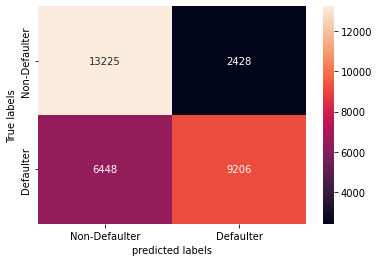

In [ ]:
labels = ['Non-Defaulter', 'Defaulter']
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_pred_proba_DTC = optimal_DTC_clf.predict_proba(X_test)[::,1]
y_pred_proba_DTC

array([0.23262216, 0.23262216, 0.4887218 , ..., 0.18813387, 0.10884354,
       0.46645161])

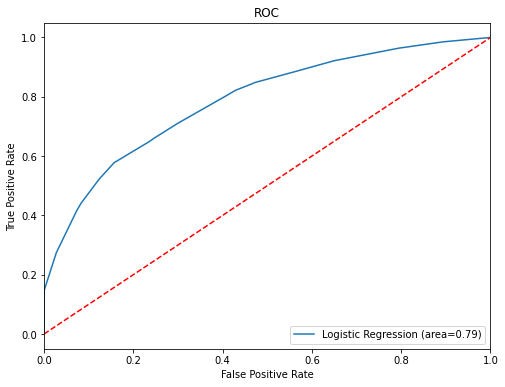

In [ ]:
logit_roc_auc  = roc_auc_score(y_test,y_pred_proba_DTC)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_DTC)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the predicted probability
train_preds_proba = rf_clf.predict_proba(X_train)
print(train_preds_proba)
test_preds_proba = rf_clf.predict_proba(X_test)
print(test_preds_proba)

[[0.95 0.05]
 [0.21 0.79]
 [0.27 0.73]
 ...
 [0.96 0.04]
 [0.93 0.07]
 [0.03 0.97]]
[[0.84 0.16]
 [0.82 0.18]
 [0.61 0.39]
 ...
 [0.79 0.21]
 [0.69 0.31]
 [0.12 0.88]]


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
print(train_class_preds)
test_class_preds = rf_clf.predict(X_test)
print(test_class_preds)

[0 1 1 ... 0 0 1]
[0 0 0 ... 0 0 1]


In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.999520873925959
The accuracy on test data is  0.8332792944685818


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8332792944685818
The precision on test data is  0.8025940337224384
The recall on test data is  0.8550504352632307
The f1 on test data is  0.8279922392453335
The roc_score on test data is  0.834538902871107


In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      7711
           1       0.86      0.80      0.83      7710

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:

grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.8207748980422284

In [ ]:

grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:

# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      7711
           1       0.85      0.80      0.83      7710

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



In [ ]:

len(optimal_rf_clf.feature_importances_)

82

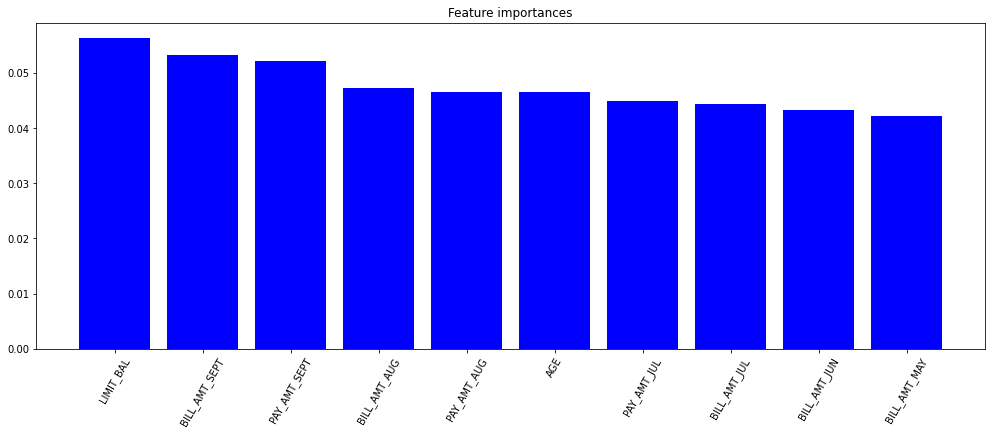

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 60)
plt.show()

In [ ]:
import torch

In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Capstone Project-03{model_save_name}" 
torch.save(optimal_rf_clf, path)


In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Capstone Project-03{model_save_name}"
optimal_rf_clf = torch.load(path)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

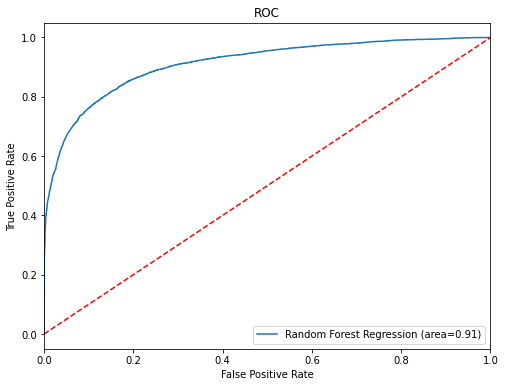

In [ ]:
logit_roc_auc  = roc_auc_score(y_test,y_preds_proba_rf)
fpr,tpr,thresholds = roc_curve(y_test,y_preds_proba_rf)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label='Random Forest Regression (area=%0.2f)' % logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)


In [ ]:
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:

gsearch1.best_score_

0.8212541159448983

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the predicted probability
train_preds_proba = optimal_xgb.predict_proba(X_train)
print(train_preds_proba)
test_preds_proba = optimal_xgb.predict_proba(X_test)
print(test_preds_proba)

[[0.97238386 0.02761617]
 [0.27946025 0.72053975]
 [0.32406455 0.67593545]
 ...
 [0.9800815  0.01991848]
 [0.83935714 0.16064285]
 [0.13901198 0.860988  ]]
[[0.8714891  0.12851089]
 [0.73687434 0.26312566]
 [0.70833147 0.29166856]
 ...
 [0.84618175 0.15381828]
 [0.5658812  0.4341188 ]
 [0.06344008 0.9365599 ]]


In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9148433257737886
The accuracy on test data is  0.8265352441475909


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8265352441475909
The precision on test data is  0.7888456549935149
The recall on test data is  0.8531350820591949
The f1 on test data is  0.8197317878563246
The roc_score on train data is  0.828400633166597


In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7711
           1       0.85      0.79      0.82      7710

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



In [ ]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.146558
PAY_JUL_1,0.132694
PAY_AUG_2,0.088530
PAY_APR_1,0.051146
PAY_SEPT_2,0.050380
PAY_JUN_1,0.048480
PAY_MAY_1,0.042072
MARRIAGE_married,0.028971
SEX,0.028923
PAY_SEPT_1,0.026258


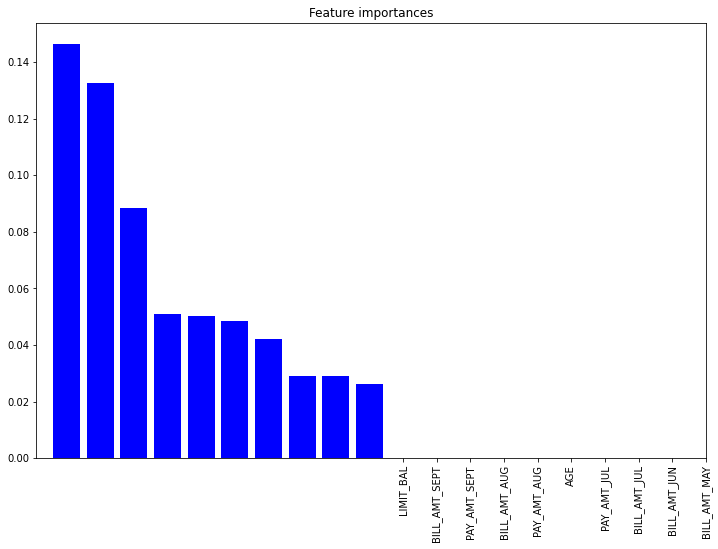

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(12,8))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b")
plt.xticks(feature_importances_rf.index, rotation = 90)
plt.show()

In [ ]:

y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]
y_preds_proba_xgb

array([0.12851089, 0.26312566, 0.29166856, ..., 0.15381828, 0.4341188 ,
       0.9365599 ], dtype=float32)

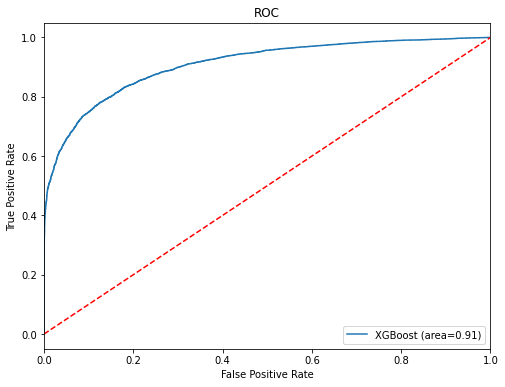

In [ ]:
logit_roc_auc  = roc_auc_score(y_test,y_preds_proba_xgb)
fpr,tpr,thresholds = roc_curve(y_test,y_preds_proba_xgb)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label='XGBoost (area=%0.2f)' % logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Capstone Project-03{model_save_name}" 
torch.save(optimal_xgb, path)

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Capstone Project-03{model_save_name}"
optimal_xgb = torch.load(path)

# **Evaluating the models**

In [ ]:

classifiers = ['Logistic Regression', 'Decision Tree Clf', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, test_accuracy_dt, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_dt, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_dt, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_dt, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_dt, test_f1_score_rf, test_f1_score_xgb_tuned]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.755022,0.754405,0.693965,0.789354,0.738592
1,Decision Tree Clf,0.710136,0.710136,0.581842,0.782624,0.667460
2,Random Forest CLf,0.999521,0.833279,0.802594,0.855050,0.827992
3,Xgboost Clf,0.914843,0.826535,0.788846,0.853135,0.819732


# **Plotting ROC AUC for all the models**

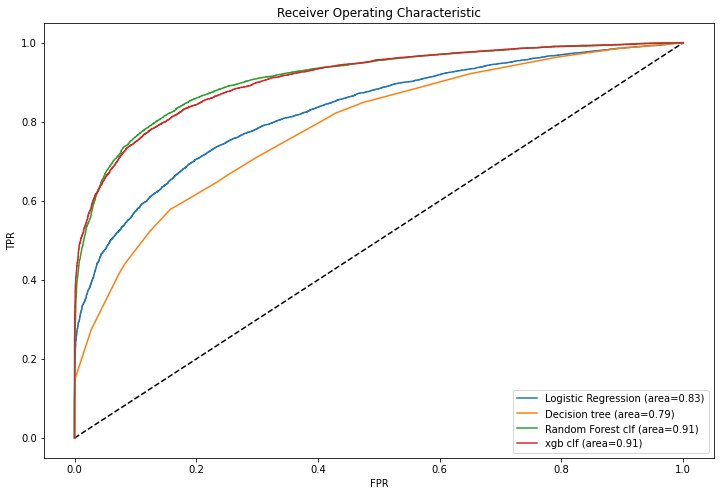

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = optimized_clf.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = optimal_DTC_clf .predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = optimal_rf_clf.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = optimal_xgb.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1], 'k--')
logit_roc_auc_lr  = roc_auc_score(y_test,y_pred_prob1)
plt.plot(fpr1, tpr1, label= 'Logistic Regression (area=%0.2f)' % logit_roc_auc_lr)
logit_roc_auc_dt  = roc_auc_score(y_test,y_pred_prob2)
plt.plot(fpr2, tpr2, label= 'Decision tree (area=%0.2f)' % logit_roc_auc_dt)
logit_roc_auc_rf  = roc_auc_score(y_test,y_pred_prob3)
plt.plot(fpr3, tpr3, label= 'Random Forest clf (area=%0.2f)' % logit_roc_auc_rf)
logit_roc_auc_xgb  = roc_auc_score(y_test,y_pred_prob4)
plt.plot(fpr4, tpr4, label= 'xgb clf (area=%0.2f)' % logit_roc_auc_xgb)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# **Conclusion**
Machine learning methods, in conjunction with the use of imbalanced methods, have been utilized in various domains. The objective of this paper is to train various supervised learning algorithms to predict the client’s behavior in paying off the credit card balance. In classification problems, an imbalanced dataset is also crucial to enhance the performance of the model, so different resampling techniques were also used to balance the dataset. We first investigated the datasets by using exploratory data analysis techniques, including data normalization. 
However, all the models implemented achieved comparable results in terms of accuracy.

●	Recent 2 payment status and credit limit are the strongest default predictors.

●	Dormant customers can also have default risk.

●	Random Forest has the best precision and recall balance.

●	Higher recall can be achieved if low precision is acceptable.

●	Model can be served as an aid to human decision.

●	Suggest output probabilities rather than predictions.

●	Model can be improved with more data and computational resources.
